# __Глава 2.2. Реализация алгоритма обучения персептрона на Python__

## __Глава 2.2.1. Объектно-ориентированный API персептрона__

Воспользуемся объектно-ориентированным подходом к определению интерфейса персептрона в виде класса Python, что позволит нам инициализировать новые объекты __perceptron__, которые могут обучаться на основе данных с помощью метода __fit__ и делать прогнозы с помощью отдельного метода __predict__. По соглашению добавим символ подчеркивания __"_"__ к атрибутам, если они не создаются при инициализации объекта, но когда это происходит при вызове других методов оюъекта - например: __self.w___

In [8]:
import numpy as np

class Perceptron:
  """
  Персептронный классификатор

  Параметры
  ----------
  eta: float
    Скорость обучения (между 0.0 и 1.0)
  n_iter: int
    Количество проходов по обучающему набору
  random_state: int
    Опорное значение генератора случайных чисел для инициализации весов


  Атрибуты
  ----------
  w_ : 1d-array
    Веса после подгонки
  b_ : Scalar
    Смещение после подгонки
  errors_ : list
    Количество неправильных классификаций (обновлений) в каждой эпохе

  """
  def __init__(self, eta=0.1, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    """
    Соответствие тренировочным данным

    Параметры
    ----------
    X : {array-like}, shape = [n_examples, n_features]
      Обучающий вектор, где n_examples - это количество образцов,
      а n_features - количество признаков

    y : array-like, shape = [n_examples]
      Целевые значения


    Возвращаемые значения
    ----------
    self : object

    """
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float64(0.)
    self.errors_ = []

    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0)
      self.errors_.append(errors)
    return self

  def net_input(self, X):
      """Вычисление фактического входа"""
      return np.dot(X, self.w_) + self.b_

  def predict(self, X):
      """Возвращает метки класса после шага"""
      return np.where(self.net_input(X) >= 0.0, 1, 0)

Теперь, используя эту реализацию, мы можем инициализировать новые объекты __Perceptron__ с заданной скоростью обучения __eta (η)__ и количеством эпох __n_iter__ (проходит через набор обучающих данных).

С помощью метода __fit__ мы инициализируем смещение __self.b___ начальным значением 0, а веса в __self.w___ - вектором __R^m__, где __m__ обозначает количество измерений (признаков) в наборе данных.

Важно, что начальный вектор весов содержит небольшие случайные числа, взятые из нормального распределения со стандартным отклонением 0.01 через __rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])__, где __rgen__ - генератор случайных чисел NumPy, который мы инициализировали заданным пользователем случайным начальным числом, чтобы при желании можно было воспроизвести предыдущие результаты.

После инициализации весов метод __fit__ перебирает все отдельные примеры в обучающем наборе данных и обновляет веса в соответствии с правилом обучения персптрона. из главы 2.1.2.

За предсказание метки класса отвечает метод __predict__, который вызывается в методе __fit__ во время обучения, чтобы получить метку класса для обновления веса, но __predict__ также можно использовать для предсказания меток классов новых данных после обучения модели. Кроме того, мы также собираем количество ошибочных классификаций в течение каждой эпохи в списке __self.errors___, чтобы позже можно было проанализировать, насколько хорошо наш персптрон работал во время обучения. Функция __np.dot__ используемая в методе __net_input__, просто вычисляет векторно-скалярное произведение __w^T * x + b__.

## __Глава 2.2.2. Обучение модели персептрона на наборе данных Iris__

In [9]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)

df = pd.read_csv(s,
                 header=None,
                 encoding='utf-8')

df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Далее мы извлекаем первые 100 меток классов, которые соответствуют 50 цветкам Iris-setosa и 50 цветкам Iris-versicolor, и преобразуем метки классов в две целочисленные метки: __1__(versicolor) и __0__(setosa), которые мы присваиваем вектор __y__, где метод __values__ квадра данных pandas __DataFrame__ дает соответствующее представление NumPy.

Точно так же мы извлекаем первый столбец признаков (длина чашелистика) и третий столбец признаков (длина лепестков) из этих 100 обучающих образцов и присваиваем их матрице признаков __x__, которую визуализируем с помощью двумерной диаграммы рассеяния:

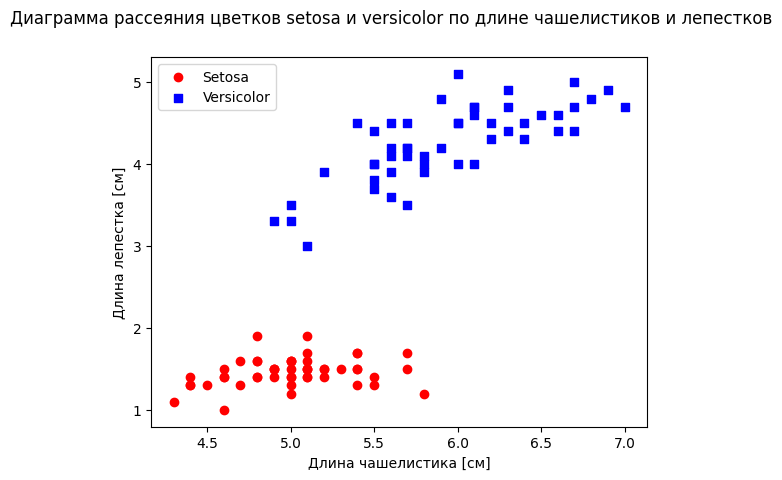

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Выбираем setosa и versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# Извлекаем длину чашелистика и длину лепестка
X = df.iloc[0:100, [0, 2]].values

# print(y, X)
# Отображаем данные
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.suptitle('Диаграмма рассеяния цветков setosa и versicolor по длине чашелистиков и лепестков')

plt.show()

Мы получили диаграмму рассейяния, где показано распределение образцов цветов в наборе данных Iris по двум осям признаков: длина лепестков и длина чашелистиков. Судя по двумерному пространству признаков, линейной разделяющей границы должно быть достаточно, чтобы отделить цветки setosa от цветков versicolor. Следовательно, линейный классификатор, такой как персептрон, должен идеально классифицировать цветки в этом наборе данных.

Теперь пришло время обучить наш алгоритм персптрона на подмножестве данных Iris, которое мы только что извлекли. Кроме того, мы построим график ошибки неправильной классификации для каждой эпохи, чтобы првоерить, сошелся ли алгоритм и нашел ли он границу, которая разделяет два класса цветов ириса:

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)

# проверяем список атрибутов и методов объекта
print(dir(ppn))

# или отдельно:
print(hasattr(ppn, "predict"))   # должно вывести True

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'eta', 'fit', 'n_iter', 'net_input', 'predict', 'random_state']
True


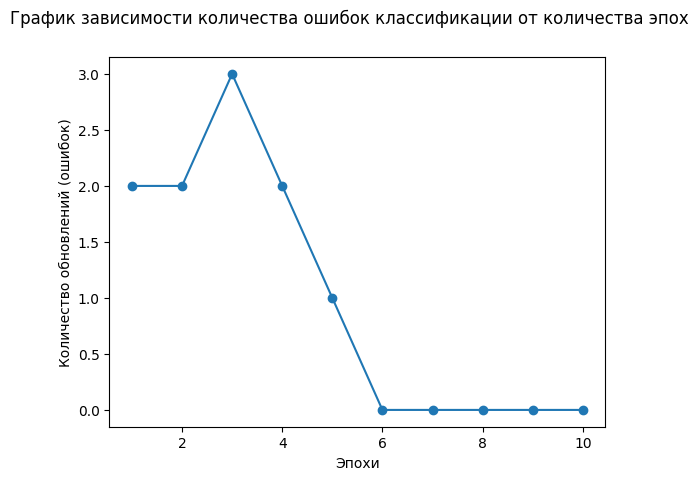

In [19]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений (ошибок)')
plt.suptitle('График зависимости количества ошибок классификации от количества эпох')

plt.show()

Как видно из рисунка, наш персептрон соешлся после шестой эпохи и теперь должен идеально классифицировать обучающие примеры. Давайте напишем небольшую удобную функцию визуализации решающих границ для двумерных наборов данных:

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    #Настройки генератора меток и цветовой карты
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #Построение решающей поверхности
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #Построение образцов класса
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

Сначала мы здесь определяем количество __colors__ и __markers__ и создаем палитру из списка цветов при помощи __ListedColormap__. Затем определяем минимальное и максимальное значения для двух признаков и используем эти векторы признаков для создания с помощью функции NumPy __meshgrid__ пары матричных массивов: __xx1__ и __xx2__. Поскольку мы обучили наш классификатор персптрона на двух измерениях признаков, нам нужно получить плоские матричные массивы и создать матрицу с тем же количеством столбцов, что и обучающее подмножество Iris, - чтобы мы могли использовать метод __predict__ ля прогнозирвоания меток классов __lab__ соответствующих узлов сетки.

Выполнив преобразование меток прогнозируемых классов __lab__ в сетку с теми же размерами, что и xx1 и xx2, теперь мы моем нарисовать контурный график с помощью функции __contourf__ библиотеки Matplotlib, которая отображает различные области решений в разные цвета для каждого прогнозируемого класса в матричном массиву:

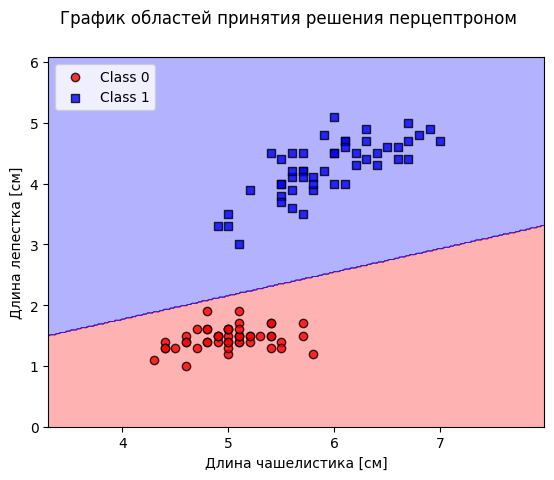

In [18]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Длина чашелистика [см]')
plt.ylabel('Длина лепестка [см]')
plt.legend(loc='upper left')
plt.suptitle('График областей принятия решения перцептроном')

plt.show()

Тем самым, мы получили графическое представление областей принятия решений.

Как мы видими на графике, персептрон нашел разделяющую границу, которая может идеально классифицировать все примеры цветков в обучающем подмножестве Iris.

## __Выводы__

Хоть персептрон идеально классифицировал два класса цветков ириса, __сходимость - одна из самых больших проблем персептрона__. _Розенблатт математически доказал, что правило обучения персептрона сходится, если два класса можно разделить линейной гиперплоскостью_. Однако, если классы не могут быть идеально разделены такой линейной границей, веса никогда не перестанут обновляться, если мы не установим максимальное кол-во эпох.
